# Assignment 10 Hydrogen Atom Wave Function

based on https://www.compadre.org/PICUP/exercises/exercise.cfm?I=115&A=shooting by Andy Rundquist

This Assignment should take you approximately 90 minutes to complete. It's most helpful if you've successfully completed Assignments 6 and 7 prior to beginning this Assignment.

After completing this Assignment, you will be able to...
* Describe unique properties of the hydrogen atom problem.
* Apply the Shooting Method to the hydrogen atom potential energy to determine eigenenergies and eigenfunctions.
* Calculate expectation values of the hydrogen atom using numerical integration.
* Calculate uncertainty based on expectation values.
* Evaluate patterns in expectation values and uncertainty based on changes in quantum numbers.

Dr. Lane welcomes your questions about this assignment. Please send or bring a copy of your work-in-progress with your questions.

## Recap

### The Wave Function $\psi$

We learned in Assignment 6 that all of quantum mechanics is govered by the **Schrodinger equation**, which relates the **wave funciton** $\psi(x)$ of an electron to the **potential energy** $V(x)$ that the electron experiences:

$$
-\frac{\hbar^2}{2m} \psi'' + V \psi = E \psi,
$$

where $\hbar$ is Planck's constant, $m$ is the electron's mass, and $E$ is the electron's total energy (kinetic plus potential). This is a **differential equation**, meaning the answer is a function $\psi(x)$. This wave function has a few special properties:
* Squaring $\psi$ tells you the probability density of where you can find the electron. Wherever $\psi = 0$, the electron cannot be; wherever $\psi$ is larger, the electron is more likely to be.
* $\psi$ has to be finite everywhere.
* $\psi$ has to a continuous single-valued function.
* $\psi$ has to drop to 0 as $x$ appropaches $\pm \infty$.
* Only special functions can qualify to be a wave function. The mathematical term for "special function" is **eigenfunction**. Each eigenfunction is associated with a special energy value, or **eigenenergy**. Each potential energy $V(x)$ that you study has a set of eigenfunctions and eigenenergies. For most problems, we have no way of knowing ahead of time what those eigenfunctions and eigenenergies will look like.

Differential equations are notoriously complicated to solve. Our textbook will walk you through the solution of a handful, but for most potential energy functions, we **can't** develop a solution.

But if we use computational methods, we can graph a numerical solution for **any** potential energy function. You'll learn how to carry out such a method in this Assignment.

### The Shooting Method for getting $E$ and $\psi$

We learned in Assignment 6 that a basic way of solving the Schrodinger equation is [the shooting method](https://en.wikipedia.org/wiki/Shooting_method). In this method, we guess a value for $E$ and start at the left side of our graph, with values for $x$, $\psi$, and $\psi'$. The energy is the piece we're most interested in; the actual values of $\psi$ and $\psi'$ aren't as important as the general shape of $\psi$ vs. $x$. 

The initial guess for $E$ doesn't need to be very accurate; in most cases, we can't expect it to be accurate at all. But we'll refine this guess and run the code many times until we hone in on the correct value.

With our guess for $E$, we use the Euler-Cromer algorithm (much like we did in Assignment 2) to "launch" the wave function from the starting point (hence the name "shooting method"):

$$
\begin{eqnarray}
\psi'(x+dx) &=& \psi'(x) + \psi''(x)*dx \\
\psi(x+dx) &=& \psi(x) + \psi'(x+dx)*dx
\end{eqnarray}
$$

Just like in Euler-Cromer, we start with initial values of $\psi$ and $\psi'$ and repeat this procedure until we reach a desired endpoint. This process is essentially the same as using a Reimann sum, and the Shooting Method is a way of integrating the Schrodinger equation. Here's an animation of this process:

![infinite well](images/infiniteflat.gif)

The main differences between the Shooting Method and the Euler-Cromer algorithm are that...
* We're using $x$ instead of $t$ as an independent variable.
* We don't really care about the actual numerical values of $\psi$, just its shape.
* We're looking for $\psi$ to end with a certain shape.

Remember, $\psi$ has to be finite everywhere, single-valued, and continuous, and must go to 0 as $x \rightarrow \pm \infty$. The first three qualities (finite everywhere, single-valued, and continuous) are pretty easy to meet; the Shooting Method can't really give us a $\psi$ that breaks any of these. The trouble comes in with $\psi$ going to 0 at infinity. Unless we've stumbled upon the correct eigenenergy, this is impossible to obtain.

**However**, the Shooting Method gives us a way to tell where the correct eigenergy is. Here's the result of the Shooting Method for a particular potential energy (it doesn't really matter which) with an eigenenergy guess of 1.00:
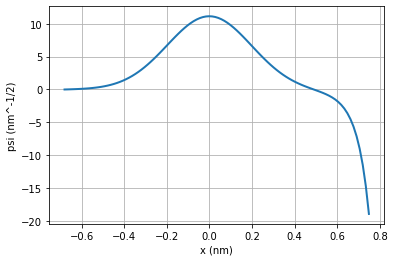

$\psi$ is heading down toward $-\infty$, so we know we have the wrong eigenenergy.

Now here's the result of the Shooting Method for hte same potential energy with an eigenenergy ugess of 0.95:
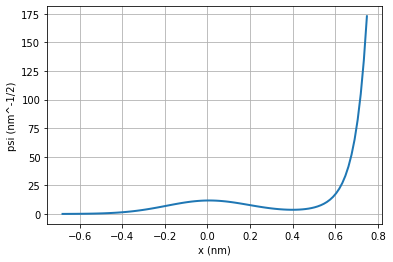

$\psi$ is now heading up toward $+\infty$. Although both 1.00 and 0.95 are not the correct eigenenergy, because their tails flip in different directions, **we do know that the correct eigenenergy has to be between 0.95 and 1.00!** When using the Shooting Method, you keep adjusting your guess for the eigenenergy until the tail of $\psi$ approaches the value that you want. For example, we would next try 0.975, and then keep splitting the difference.

Notice that we would need infinite accuracy to reach a $\psi$ that stayed nailed down at 0 perfectly. But we don't need that much accuracy. In this Assignment, you'll only need to determine eigenenergies out to 4 significant digits.

The only thing to be careful about is to look at energies that are above the minimum of the well (energies less than that will alway run away to infinity).

## Step 1: The Hydrogen Atom

The hydrogen atom is perhaps the most important problem in quantum mechanics. Solving this problem gives chemists the periodic table. To model a hydrogen atom, we want to get $\psi$ for an electron going around a proton. The potential energy is the Coulomb potential energy from introductory physics:

$$
V(r) = -k \frac{e^2}{r}.
$$

We don't need to model the proton just to understand the atom; the electron is doing everything important. This potential energy is a little bit different than the ones from Assignments 6 & 7:
* The position variable $r$, which represents the distance between the proton and the electron, only ranges from $0$ to $\infty$ instead of $-\infty$ to $\infty$.
* We also need to consider motion along two angles, $\theta$ and $\phi$, rotating around the proton. 
* Your textook (Chapter 7 of Thornton & Rex) walks you through how we separate the wave function $\psi(r,\theta,\phi)$ into three separate functions $\psi(r,\theta,\phi) = R(r) f(\theta) g(\phi)$ and solve for each piece. This code will solve for the most important part $R(r)$.
* The second derivative $\psi''$ has to be replaced by a three-dimensional second derivative. When we apply this derivative  and the three-piece function for $\psi$ the Schrodinger equation for $R$ becomes (deep breath):
$$
\frac{ d^2 R }{dr^2} + \frac{2}{r}\frac{dR}{dr} + \frac{2m}{\hbar^2}\left( E+k\frac{e^2}{r}-\frac{\hbar^2}{2m}\frac{l(l+1)}{r^2}\right) R = 0
$$

If ever there was a differential equation that we need a computer to study, this is it.

The $l$ here is the **angular momentum quantum number**. This number has to meet the requirement $0\leq l \leq n-1$, where $n$ is the energy level ($1, 2, 3, \ldots$) as usual. It turns out that $l$ doesn't affect the eigenenergy $E_n$, but it does affect the wave function $R_{nl}$.

What are the primary differences bewteen the Schrodinger equation for $\psi$ and the Schrodinger equation for $R$?

[Add your answers here.]

## Step 2: Getting $R_{n0}$ and $E_n$

Let's start with $l = 0$ and try to find the lowest eigenenergy $E_1$. Using the two code cells below, what's the lowest eigenenergy $E_n$ you can use that produces an $R$ that doesn't diverge as $r \rightarrow \infty$? (**Hint**: All of the bound state eigenergies are less than 0.)

After that, move the eigenenergy up toward 0. Find 5 eigenergies and list them below.

[Add your answer here.]

What patterns do you notice about the wave function $R_n(r)$ as the energy level $n$ increases? How do their shapes become more complicated as $n$ increases?

[Add your answer here.]

In [21]:
from pylab import *

#UNITS: All lengths are in nm, all energies/masses are in eV.
hbar = 197 # hbar*c = 197 eV*nm
me = 511000 # me*c^2 = 511000 eV
ke2 = 1.44 # k*e^2 = 1.44 eV*nm
Z = 1 # number of protons in the nucleus; increase this to change the element

def RDoublePrime(r,R,Rprime):
    return -2*Rprime/r - 2*me/hbar**2*(E+Z*ke2/r)*R + l*(l+1)/r**2*R

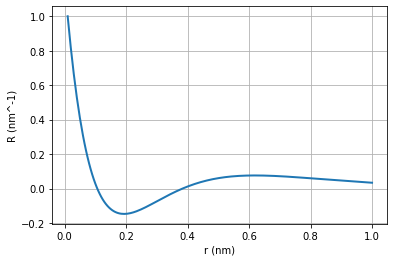

In [20]:
# Enter your guess for the energy here. Units are eV.
E = ??
l = 0 # Angular momentum number. Start at 0.

# Enter minimum and maximum x and initial values for psi and psiPrime.
rmin = 1e-2
rmax = 10e-1
R = 1
Rprime = 0
nPoints = 200

dx = (rmax-rmin)/nPoints

rArray = linspace(rmin,rmax,nPoints)
Rarray = zeros(nPoints)

for i in range(len(rArray)):
    Rarray[i] = R # Record previous value of R.
    Rprime += RDoublePrime(rArray[i],R,Rprime)*dx # Step forward with Rprime.
    R += Rprime*dx # Step forward with R.

# Create plot
figure(1)
plot(rArray, Rarray, linewidth=2)
xlabel('r (nm)')
ylabel('R (nm^-1)')
grid(True)
show()

## Step 3: Getting $R_nl$ for different $l$

Now that you have the eigenenergies, you can obtain the $R_{nl}$s for all the legal values of $l$. (For $n=1$, you can have $l=0$; for $n=2$, you can have $l=0$ and $l=1$; for $n=3$, you can have $l=0$, $l=1$, and $l=2$, etc.) They all have the same energy value; you just change the angular momentum quantum number $l$. Use the code above to compute $R_{nl}$. What do you notice happens to $R_{nl}$ as you increase $l$? How do the graph's features change?

[Add your answer here.]

## More Recap
### Expectation Values

In Assignment 7, we learned that it's helpful to calculate **expectation values** of physically measurable quantities. An expectation value represents the average value you would *expect* to see after measuring that quantity many times.

Suppose, for example, we have an electron with a wave function $\psi$ (which we get from the Shooting Method in Assignment 6) and we want to measure its position $x$ many times. The expectation value of $x$, deonted $\langle x \rangle$, is calculated with an integral:

$$ \langle x \rangle = \int_{-\infty}^{+\infty} \psi x \psi dx $$.

Similarly, if you wanted the expectation value of $x^2$, you would integrate

$$ \langle x^2 \rangle = \int_{-\infty}^{+\infty} \psi x^2 \psi dx $$.

The quantity you want the expectation value of gets sandwiched between two copies of the wave function. (The wave function on the left is supposed to be the complex conjugate, but we're only working with real $\psi$s for now.)

### Numerical Integration

If you know an exact expression for $\psi$, you might be able to carry out the integrals above. However, most of the time we don't know $\psi$ but rather have a list of values for $\psi$, obtained from a computational method like the Shooting Method. However, these numerical values give us all the information we need to calcualte expectation values.

We can **numerically integrate** an expectation value using a simple Reimann sum. For example, the expectation value of position is

$$ \langle x \rangle = \sum_j \psi_j x_j \psi_j dx,$$

where $dx$ is our step size from the Shooting Method. We already have the $\psi_n$s and the $x_j$s stored in arrays after completing the Shooting Method, so we just need a **loop** to carry out the summation.

## Step 4: Expectation values with $R$

We can also calcualte expectation values from $R_{nl}$. The only pieces that are different are the integration bounds ($0$ to $\infty$) and the addition of a factor of $r^2$ in the integrand. This comes from carrying out integrals in spherical coordinates. So, for example, the exepctation value of $r$ is

$$ \langle r \rangle = \int_{0}^{\infty} R_{nl} r R_{nl} r^2 dr $$.

These differences show up in the computational summation, as well:

$$ \langle r \rangle = \sum_j R_j r_j R_j r_j^2 dx.$$

What units should $R$ have, based on this expectation value integral?

[Add your answer here.]

Use the exact expression for $R_{10}(r) = \frac{2}{a_0^{3/2}} e^{-r/a_0}$ to find $\langle r \rangle$ exactly, where $a_0$ is the **Bohr radius**.

[Add your answer here. Format your math with $\LaTeX$.]

## Step 5: $\langle r \rangle$ and $\langle r^2 \rangle$ for the Hydrogen Atom

In the code cell below, finish the loop so that it calculates and prints $\langle r \rangle$ and $\langle r^2 \rangle$. Record these values for each pair of $n$ and $l$ that you used above. What patterns do you notice as you increase $n$ and $l$?

[Add your answers here.]

In [11]:
expectationr = 0
expectationr2 = 0
for i in range(len(rArray)):
    expectationr = expectationr + ??
    expectationr2 = expectationr2 + ??
print(expectationr)
print(expectationr2)

0.0047300731033367155


## Step 6: Uncertainty

One of the most important quantities in quantum mecahnics is the **uncertainty** (or standard deviation) in a measurable quantity. Uncertainy is defined as the expectation value of the square minus the square of the expectation value, all under a square root. **That's a mouthful**; it's more easily written with math:

$$
\Delta r = \sqrt{ \langle r^2 \rangle - \langle r \rangle^2 }.
$$

Calculate $\Delta r$ for each pair of $n$ and $l$ that you used above. What pattern do you notice in $\Delta r$ as the quantum numbers increse? (You might like to have Python do the math for you.)

[Add your answer here.]

In [12]:
# Here's a code cell, in case that's helpful!

# EXTRA CREDIT
## Step 7: Repeat for Helium et al
Repeat this entire notebook for the helium atom (changing the atomic number $Z$ to 2). Then repeat it for lithium ($Z = 3$), and beryllim ($Z = 4$), and more elements until you can explain the pattern in how $E_n$ and $R_{nl}$ change as you move up the periodic table.